In [1]:
%matplotlib inline
from matplotlib import pyplot

In [2]:
%run -i loom.py
%run -i weave_grids.py
%run -i render_weave_grids.py
%run -i weave_map.py

## Basic usage
### Biaxial example
Note that we use a non-zero `linewidth` to detect if there are any remaining topological issues with the MultiPolygon shapes forming each strand.

<AxesSubplot:>

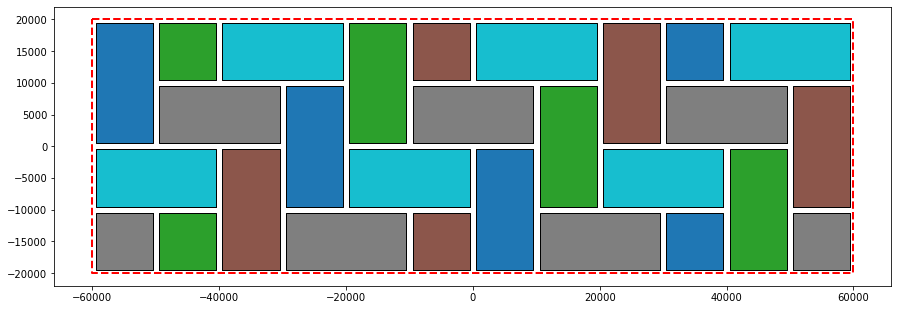

In [3]:
w = get_weave_unit(weave_type = "twill", aspect = 1, margin = .05, strands = "abc|de")

fig = pyplot.figure(figsize = (15, 6))
ax = fig.add_subplot(111)
w.weave_unit.plot(ax = ax, column = "strand", edgecolor = "black", linewidth = 1.)
w.tile.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "r", linewidth = 2., linestyle = "dashed")

### Triaxial example

<AxesSubplot:>

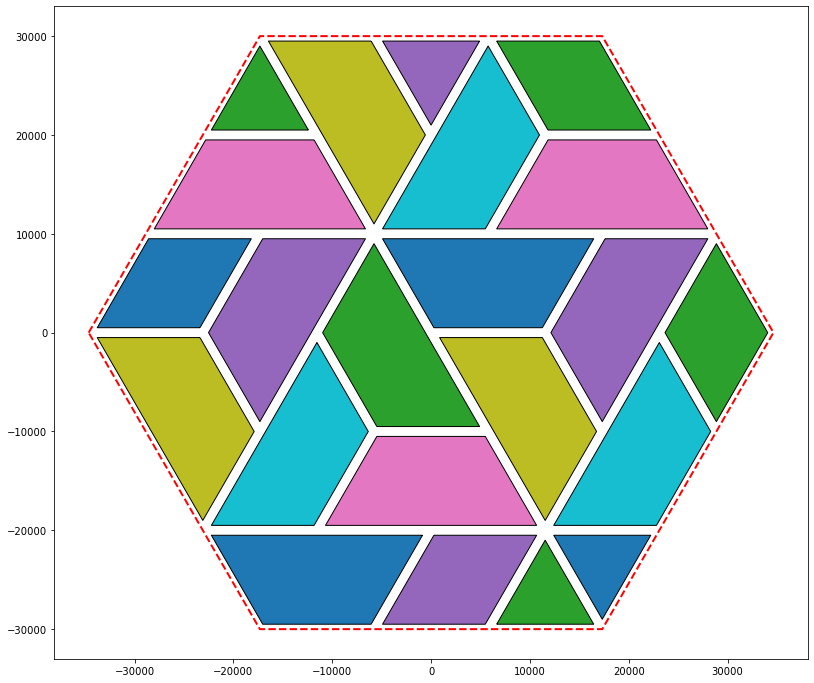

In [4]:
w = get_weave_unit(weave_type = "cube", aspect = 1, margin = 0.05, strands = "ad-|b-e|-cf")

fig = pyplot.figure(figsize = (15, 12))
ax = fig.add_subplot(111)
w.weave_unit.plot(ax = ax, column = "strand", edgecolor = "black", linewidth = 1.)
w.tile.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "r", linewidth = 2., linestyle = "dashed")

### (Internal) usage of the `_WeaveGrid` class
`_WeaveGrid` isn't really intended for external usage. It handles creating strand intersection site geometries given specified number of axes (either 2 or 3) and a tuple of orientations (or directions) for the different axes. `_WeaveGrid` has the constructor signature

    def __init__(self, n_axes, orientations, spacing, precision = 1):

where `n_axes` (required) is 2 or 3, `orientations` (required) is `(0, -90)` or `(0, 120, 240)`. These are supplied in use by the `Loom` object (in time, the `_WeaveGrid` may become an attribute of the `Loom` instance).

The main methods accessed by the loom that are used in rendering the weave unit tile are 

+ `get_grid_cell_at()`, which takes weave unit coordinates---either Cartesian for a biaxial weave or ternary for a triaxial, and
+ `get_visible_cell_strands()` which creates the strand geometries for a specific intersection

<AxesSubplot:>

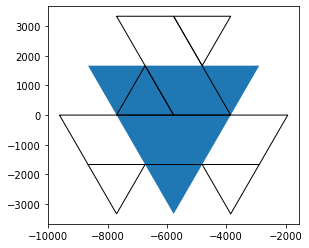

In [5]:
coords = (1, 2, 0)

g = _WeaveGrid(3, (0, 120, 240), 5000)
c = geopandas.GeoSeries([g.get_grid_cell_at(coords)])
ax = c.plot()

vcs = g.get_visible_cell_strands(width = 1/3, coords = coords)
vcs = geopandas.GeoSeries(vcs)
vcs.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "k")
